# Plots of 2- to 5- Qubit Grover Search Code

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

from qiskit import (QuantumCircuit, IBMQ, Aer, transpile, execute)

## Circuits

In [2]:
# Initialization Circuits
qc_init_2 = QuantumCircuit(2)
qc_init_3 = QuantumCircuit(3)
qc_init_4 = QuantumCircuit(4)
qc_init_5 = QuantumCircuit(5)

# List of 2- to 5- qubit circuits
init_list = [qc_init_2, qc_init_3, qc_init_4, qc_init_5]

# Initial Hadamards
for circuit in init_list:
    circuit.h(range(circuit.num_qubits))

In [3]:
# Oracles for the experiments (taken from previous code)

# 2 Qubits Oracle
def oracle_two(circuit:QuantumCircuit):
    #Apply Oracle to tag |01> state
    circuit.x(1)
    circuit.cz(0,1)
    circuit.x(1)
    return circuit

# 3 Qubits Oracle
def oracle_three(circuit:QuantumCircuit):
    #Apply Oracle to tag |010> state
    circuit.x([0,2])
    circuit.h(2)
    circuit.mcx([0,1],2)
    circuit.h(2)
    circuit.x([0,2])
    return circuit

# 4 Qubits Oracle
def oracle_four(circuit:QuantumCircuit):
    #Apply Oracle to tag |0010> state
    circuit.x([0,2,3])
    circuit.h(3)
    circuit.mcx([0,1,2],3)
    circuit.h(3)
    circuit.x([0,2,3])
    return circuit

# 5 Qubits Oracle
def oracle_five(circuit:QuantumCircuit):
    #Apply Oracle to tag |11100> state
    circuit.x([0,1])
    circuit.h(4)
    circuit.mcx([0,1,2,3],4)
    circuit.h(4)
    circuit.x([0,1])
    return circuit

In [4]:
#Diffuser for two-qubit system
def diffuser_two(circuit):
    circuit.h([0,1]) #First perform Hadamard on each qubit
    circuit.x([0,1]) #Apply X Gates on each qubit
    circuit.cz(0,1)  #Apply CZ Gate
    circuit.x([0,1]) #Apply X Gates
    circuit.h([0,1]) #Apply Hadamard on each qubit

    return circuit

#Diffuser for three-qubit system
def diffuser_three(circuit):
    circuit.h([0,1,2]) #First perform Hadamard on each qubit
    circuit.x([0,1,2]) #Apply X Gates on each qubit
    
    circuit.h(2) #We apply the CZ gate by remembering that HXH = Z
    circuit.mcx([0,1],2)
    circuit.h(2)
    
    circuit.x([0,1,2]) #Apply X Gates
    circuit.h([0,1,2]) #Apply Hadamard on each qubit.

    return circuit

#Diffuser for four-qubit system
def diffuser_four(circuit):
    circuit.h([0,1,2,3]) #First perform Hadamard on each qubit
    circuit.x([0,1,2,3]) #Apply X Gates on each qubit
    
    circuit.h(3) #We apply the CZ gate by remembering that HXH = Z
    circuit.mcx([0,1,2],3)
    circuit.h(3)
    
    circuit.x([0,1,2,3]) #Apply X Gates
    circuit.h([0,1,2,3]) #Apply Hadamard on each qubit.

    return circuit

#Diffuser for five-qubit system
def diffuser_five(circuit):
    circuit.h([0,1,2,3,4]) #First perform Hadamard on each qubit
    circuit.x([0,1,2,3,4]) #Apply X Gates on each qubit
    
    circuit.h(4) #We apply the CZ gate by remembering that HXH = Z
    circuit.mcx([0,1,2,3],4)
    circuit.h(4)
    
    circuit.x([0,1,2,3,4]) #Apply X Gates
    circuit.h([0,1,2,3,4]) #Apply Hadamard on each qubit

    return circuit

In [5]:
# Create circuits for each number of qubits, with varying iterations

# Storage for the circuits by number of qubits
grover2_dict = {}
grover3_dict = {}
grover4_dict = {}
grover5_dict = {}

# Create dictionary keys
dict_keys = [str(iter+1) + "_iters" for iter in range(10)]

# Set the dictionary keys
for key in dict_keys:
    grover2_dict[key] = None
    grover3_dict[key] = None
    grover4_dict[key] = None
    grover5_dict[key] = None

In [6]:
# Oracle Circuits
orac_2q = oracle_two(QuantumCircuit(2))
orac_3q = oracle_three(QuantumCircuit(3))
orac_4q = oracle_four(QuantumCircuit(4))
orac_5q = oracle_five(QuantumCircuit(5))

# Grover Iteration Circuits (Oracle + Diffuser)
base_grover2 = diffuser_two(orac_2q)
base_grover3 = diffuser_three(orac_3q)
base_grover4 = diffuser_four(orac_4q)
base_grover5 = diffuser_five(orac_5q)

# 2-Qubit Circuits from 1-10 grover iterations
for iter in range(10):
    tmp = qc_init_2.compose(base_grover2)

    for times in range(iter):
        tmp = tmp.compose(base_grover2)

    grover2_dict[dict_keys[iter]] = tmp

# 3-Qubit Circuits from 1-10 grover iterations
for iter in range(10):
    tmp = qc_init_3.compose(base_grover3)

    for times in range(iter):
        tmp = tmp.compose(base_grover3)

    grover3_dict[dict_keys[iter]] = tmp

# 4-Qubit Circuits from 1-10 grover iterations
for iter in range(10):
    tmp = qc_init_4.compose(base_grover4)

    for times in range(iter):
        tmp = tmp.compose(base_grover4)

    grover4_dict[dict_keys[iter]] = tmp

# 5-Qubit Circuits from 1-10 grover iterations
for iter in range(10):
    tmp = qc_init_5.compose(base_grover5)

    for times in range(iter):
        tmp = tmp.compose(base_grover5)

    grover5_dict[dict_keys[iter]] = tmp

In [7]:
# Measurement applied to all circuits
grover2 = list(grover2_dict.values())
grover3 = list(grover3_dict.values())
grover4 = list(grover4_dict.values())
grover5 = list(grover5_dict.values())

[grover2[i].measure_all() for i in range(len(grover2))]
[grover3[i].measure_all() for i in range(len(grover3))]
[grover4[i].measure_all() for i in range(len(grover4))]
[grover5[i].measure_all() for i in range(len(grover5))]

[None, None, None, None, None, None, None, None, None, None]

## Backend Preparation

In [8]:
# Simulator and IBMQ_Quito Backends
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")

aer_sim = Aer.get_backend("aer_simulator")
quito = provider.get_backend("ibmq_quito")
shots = 1000

### Aer Simulator Results

In [9]:
# Transpile, execute two-qubit search
all_grover2 = transpile(grover2, aer_sim)
all_grover2_jobs = execute(all_grover2, aer_sim, shots=shots)
all_grover2_result = all_grover2_jobs.result()
all_grover2_counts = all_grover2_result.get_counts()

In [10]:
# Transpile, execute three-qubit search
all_grover3 = transpile(grover3, aer_sim)
all_grover3_jobs = execute(all_grover3, aer_sim, shots=shots)
all_grover3_result = all_grover3_jobs.result()
all_grover3_counts = all_grover3_result.get_counts()

In [11]:
# Transpile, execute four qubit search
all_grover4 = transpile(grover4, aer_sim)
all_grover4_jobs = execute(all_grover4, aer_sim, shots=shots)
all_grover4_result = all_grover4_jobs.result()
all_grover4_counts = all_grover4_result.get_counts()

In [12]:
# Transpile, execute five-qubit search
all_grover5 = transpile(grover5, aer_sim)
all_grover5_jobs = execute(all_grover5, aer_sim, shots=shots)
all_grover5_result = all_grover5_jobs.result()
all_grover5_counts = all_grover5_result.get_counts()

### Data Preparation for Plots

In [13]:
# 2 Qubits
# Get counts and probability of solution
grover2_solution_counts = [np.array(all_grover2_counts[i]['01']) for i in range(len(all_grover2_counts))]
grover2_solution_ave_probs = [grover2_solution_counts[i].mean() / shots for i in range(len(grover2_solution_counts))]

# Do same for non-solutions
grover2_nonsolution_counts = [shots - grover2_solution_counts[i].sum() for i in range(len(grover2_solution_counts))]
grover2_nonsolution_ave_probs = [grover2_nonsolution_counts[i] / ((2**2 - 1) * shots) for i in range(len(grover2_nonsolution_counts))]

# Convert lists of solution / non-solution probabilities to numpy arrays and calculate the ratio
grover2_solution_ray = np.array(grover2_solution_ave_probs)
grover2_nonsolution_ray = np.array(grover2_nonsolution_ave_probs)
grover2_ratios = np.true_divide(grover2_solution_ray, grover2_nonsolution_ray)

/var/folders/l7/tvf40cgn2b91dp9tbv9n_nzh0000gn/T/ipykernel_6822/1359404128.py:13: RuntimeWarning: divide by zero encountered in divide
  grover2_ratios = np.true_divide(grover2_solution_ray, grover2_nonsolution_ray)


In [14]:
# 3 Qubits
# Get counts and probability of solution
grover3_solution_counts = [np.array(all_grover3_counts[i]['010']) for i in range(len(all_grover3_counts))]
grover3_solution_ave_probs = [grover3_solution_counts[i].mean() / shots for i in range(len(grover3_solution_counts))]

# Do same for non-solutions
grover3_nonsolution_counts = [shots - grover3_solution_counts[i].sum() for i in range(len(grover3_solution_counts))]
grover3_nonsolution_ave_probs = [grover3_nonsolution_counts[i] / ((2**3 - 1) * shots) for i in range(len(grover3_nonsolution_counts))]

# Convert lists of solution / non-solution probabilities to numpy arrays and calculate the ratio
grover3_solution_ray = np.array(grover3_solution_ave_probs)
grover3_nonsolution_ray = np.array(grover3_nonsolution_ave_probs)
grover3_ratios = np.true_divide(grover3_solution_ray, grover3_nonsolution_ray)

/var/folders/l7/tvf40cgn2b91dp9tbv9n_nzh0000gn/T/ipykernel_6822/1522211359.py:13: RuntimeWarning: divide by zero encountered in divide
  grover3_ratios = np.true_divide(grover3_solution_ray, grover3_nonsolution_ray)


In [15]:
# 4 Qubits
# Get counts and probability of solution
grover4_solution_counts = [np.array(all_grover4_counts[i]['0010']) for i in range(len(all_grover4_counts))]
grover4_solution_ave_probs = [grover4_solution_counts[i].mean() / shots for i in range(len(grover4_solution_counts))]

# Do same for non-solutions
grover4_nonsolution_counts = [shots - grover4_solution_counts[i].sum() for i in range(len(grover4_solution_counts))]
grover4_nonsolution_ave_probs = [grover4_nonsolution_counts[i] / ((2**4 - 1) * shots) for i in range(len(grover4_nonsolution_counts))]

# Convert lists of solution / non-solution probabilities to numpy arrays and calculate the ratio
grover4_solution_ray = np.array(grover4_solution_ave_probs)
grover4_nonsolution_ray = np.array(grover4_nonsolution_ave_probs)
grover4_ratios = np.true_divide(grover4_solution_ray, grover4_nonsolution_ray)

In [16]:
# 5 Qubits
# Get counts and probability of solution
grover5_solution_counts = [np.array(all_grover5_counts[i]['11100']) for i in range(len(all_grover5_counts))]
grover5_solution_ave_probs = [grover5_solution_counts[i].mean() / shots for i in range(len(grover5_solution_counts))]

# Do same for non-solutions
grover5_nonsolution_counts = [shots - grover5_solution_counts[i].sum() for i in range(len(grover5_solution_counts))]
grover5_nonsolution_ave_probs = [grover5_nonsolution_counts[i] / ((2**5 - 1) * shots) for i in range(len(grover5_nonsolution_counts))]

# Convert lists of solution / non-solution probabilities to numpy arrays and calculate the ratio
grover5_solution_ray = np.array(grover5_solution_ave_probs)
grover5_nonsolution_ray = np.array(grover5_nonsolution_ave_probs)
grover5_ratios = np.true_divide(grover5_solution_ray, grover5_nonsolution_ray)

/var/folders/l7/tvf40cgn2b91dp9tbv9n_nzh0000gn/T/ipykernel_6822/1909225185.py:13: RuntimeWarning: divide by zero encountered in divide
  grover5_ratios = np.true_divide(grover5_solution_ray, grover5_nonsolution_ray)


## Plots

Here we define and grab the annotation locations for "infinty', which comes out blank in matplotlib graphs.

In [17]:
def infty_annotate(values):
    
    infty_locs = []
    
    for value in range(len(values)):
        if values[value] == np.inf:
            infty_locs.append(value)

    new_array = np.delete(values, infty_locs)
    new_exponent = (np.log10(new_array.max()) + np.log10(new_array.min()))/2
    height = 10**new_exponent

    return (np.array(infty_locs)+1, height)

In [18]:
(g2_xinf, g2_yinf) = infty_annotate(grover2_ratios)
(g3_xinf, g3_yinf) = infty_annotate(grover3_ratios)
(g4_xinf, g4_yinf) = infty_annotate(grover4_ratios)
(g5_xinf, g5_yinf) = infty_annotate(grover5_ratios)

/var/folders/l7/tvf40cgn2b91dp9tbv9n_nzh0000gn/T/ipykernel_6822/4239237489.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


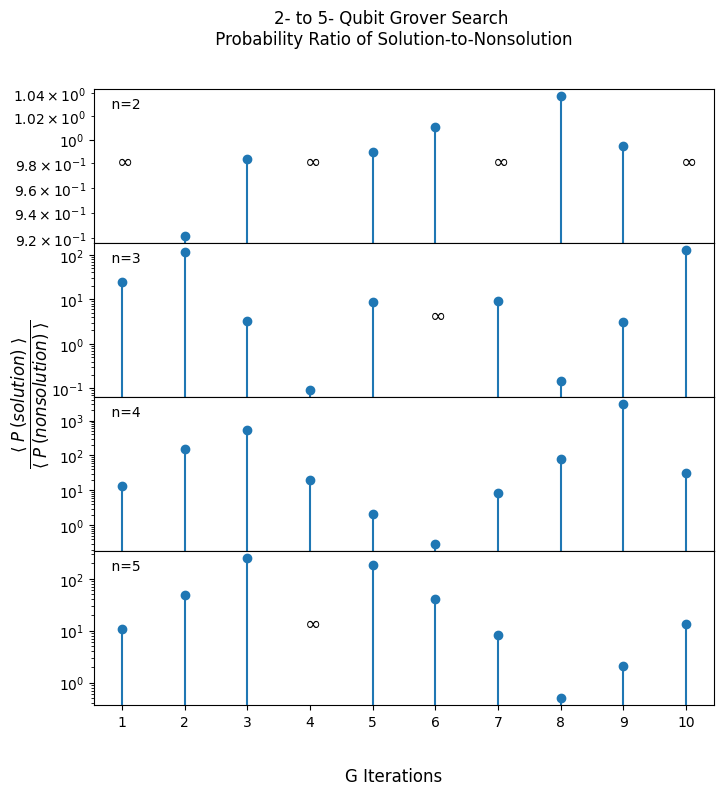

In [19]:
# Graph ratios vs. number of iterations using PyPlot

# Define x range
xrange = np.arange(1,11,1)

figure = plt.figure(1, figsize=[8,8])
figure.suptitle("2- to 5- Qubit Grover Search \n Probability Ratio of Solution-to-Nonsolution ", fontsize = "large")
figure.supxlabel("G Iterations")
figure.supylabel("$ \\dfrac{\\langle\\ P\\:(solution)\\ \\rangle}{\\langle\\ P\\:(nonsolution)\\ \\rangle} $")
gd = figure.add_gridspec(4, hspace=0)

two_qub_probs = figure.add_subplot(gd[0,0])
two_qub_probs.stem(xrange, grover2_ratios)
two_qub_probs.set_yscale("log")
two_qub_probs.set_xticks(xrange)
two_qub_probs.set_xticklabels(xrange)
two_qub_probs.set_title("    n=2", fontsize=10, loc='left', y=1, pad=-14)
two_qub_probs.label_outer()

three_qub_probs = figure.add_subplot(gd[1,0])
three_qub_probs.stem(xrange, grover3_ratios)
three_qub_probs.set_yscale("log")
three_qub_probs.set_xticks(xrange)
three_qub_probs.set_xticklabels(xrange)
three_qub_probs.set_title("    n=3", fontsize=10, loc='left', y=1, pad=-14)
# three_qub_probs.sharex(two_qub_probs)
three_qub_probs.label_outer()

four_qub_probs = figure.add_subplot(gd[2,0])
four_qub_probs.stem(xrange, grover4_ratios)
four_qub_probs.set_yscale("log")
four_qub_probs.set_xticks(xrange)
four_qub_probs.set_xticklabels(xrange)
four_qub_probs.set_title("    n=4", fontsize=10, loc='left', y=1, pad=-14)
# four_qub_probs.sharex(three_qub_probs)
four_qub_probs.label_outer()

five_qub_probs = figure.add_subplot(gd[3,0])
five_qub_probs.stem(xrange, grover5_ratios)
five_qub_probs.set_yscale("log")
five_qub_probs.set_xticks(xrange)
five_qub_probs.set_xticklabels(xrange)
five_qub_probs.set_title("    n=5", fontsize=10, loc='left', y=1, pad=-14)
# five_qub_probs.sharex(four_qub_probs)
five_qub_probs.label_outer()

# Annotations
for xloc in g2_xinf:
    two_qub_probs.annotate(text="$\\infty$", xy=(xloc-0.1,g2_yinf), xytext=(xloc-0.1,g2_yinf), fontsize=14)
for xloc in g3_xinf:
    three_qub_probs.annotate(text="$\\infty$", xy=(xloc-0.1,g3_yinf), xytext=(xloc-0.1,g3_yinf), fontsize=14)
for xloc in g4_xinf:
    four_qub_probs.annotate(text="$\\infty$", xy=(xloc-0.1,g4_yinf), xytext=(xloc-0.1,g4_yinf), fontsize=14)
for xloc in g5_xinf:
    five_qub_probs.annotate(text="$\\infty$", xy=(xloc-0.1,g5_yinf), xytext=(xloc-0.1,g5_yinf), fontsize=14)

figure.show()


### IBM Quito Results

In [20]:
# Getting IBM Quito Jobs and Counts

quito_grover2_jobs = quito.retrieve_job('6388348f68d7fab2c7451713')
quito_grover3_jobs = quito.retrieve_job('63883493c670862fef90b65a')
quito_grover4_jobs = quito.retrieve_job('63883498c505e152c1656b32')
quito_grover5_jobs = quito.retrieve_job('6388349f68d7fa225f451714')

quito_grover2_counts = quito_grover2_jobs.result().get_counts()
quito_grover3_counts = quito_grover3_jobs.result().get_counts()
quito_grover4_counts = quito_grover4_jobs.result().get_counts()
quito_grover5_counts = quito_grover5_jobs.result().get_counts()

In [21]:
# 2 Qubits
# Get counts and probability of solution
grover2_solution_counts = [np.array(quito_grover2_counts[i]['01']) for i in range(len(quito_grover2_counts))]
grover2_solution_ave_probs = [grover2_solution_counts[i].mean() / shots for i in range(len(grover2_solution_counts))]

# Do same for non-solutions
grover2_nonsolution_counts = [shots - grover2_solution_counts[i].sum() for i in range(len(grover2_solution_counts))]
grover2_nonsolution_ave_probs = [grover2_nonsolution_counts[i] / ((2**2 - 1) * shots) for i in range(len(grover2_nonsolution_counts))]

# Convert lists of solution / non-solution probabilities to numpy arrays and calculate the ratio
grover2_solution_ray = np.array(grover2_solution_ave_probs)
grover2_nonsolution_ray = np.array(grover2_nonsolution_ave_probs)
grover2_ratios = np.true_divide(grover2_solution_ray, grover2_nonsolution_ray)

In [22]:
# 3 Qubits
# Get counts and probability of solution
grover3_solution_counts = [np.array(quito_grover3_counts[i]['010']) for i in range(len(quito_grover3_counts))]
grover3_solution_ave_probs = [grover3_solution_counts[i].mean() / shots for i in range(len(grover3_solution_counts))]

# Do same for non-solutions
grover3_nonsolution_counts = [shots - grover3_solution_counts[i].sum() for i in range(len(grover3_solution_counts))]
grover3_nonsolution_ave_probs = [grover3_nonsolution_counts[i] / ((2**3 - 1) * shots) for i in range(len(grover3_nonsolution_counts))]

# Convert lists of solution / non-solution probabilities to numpy arrays and calculate the ratio
grover3_solution_ray = np.array(grover3_solution_ave_probs)
grover3_nonsolution_ray = np.array(grover3_nonsolution_ave_probs)
grover3_ratios = np.true_divide(grover3_solution_ray, grover3_nonsolution_ray)

In [23]:
# 4 Qubits
# Get counts and probability of solution
grover4_solution_counts = [np.array(quito_grover4_counts[i]['0010']) for i in range(len(quito_grover4_counts))]
grover4_solution_ave_probs = [grover4_solution_counts[i].mean() / shots for i in range(len(grover4_solution_counts))]

# Do same for non-solutions
grover4_nonsolution_counts = [shots - grover4_solution_counts[i].sum() for i in range(len(grover4_solution_counts))]
grover4_nonsolution_ave_probs = [grover4_nonsolution_counts[i] / ((2**4 - 1) * shots) for i in range(len(grover4_nonsolution_counts))]

# Convert lists of solution / non-solution probabilities to numpy arrays and calculate the ratio
grover4_solution_ray = np.array(grover4_solution_ave_probs)
grover4_nonsolution_ray = np.array(grover4_nonsolution_ave_probs)
grover4_ratios = np.true_divide(grover4_solution_ray, grover4_nonsolution_ray)

In [24]:
# 5 Qubits
# Get counts and probability of solution
grover5_solution_counts = [np.array(quito_grover5_counts[i]['11100']) for i in range(len(quito_grover5_counts))]
grover5_solution_ave_probs = [grover5_solution_counts[i].mean() / shots for i in range(len(grover5_solution_counts))]

# Do same for non-solutions
grover5_nonsolution_counts = [shots - grover5_solution_counts[i].sum() for i in range(len(grover5_solution_counts))]
grover5_nonsolution_ave_probs = [grover5_nonsolution_counts[i] / ((2**5 - 1) * shots) for i in range(len(grover5_nonsolution_counts))]

# Convert lists of solution / non-solution probabilities to numpy arrays and calculate the ratio
grover5_solution_ray = np.array(grover5_solution_ave_probs)
grover5_nonsolution_ray = np.array(grover5_nonsolution_ave_probs)
grover5_ratios = np.true_divide(grover5_solution_ray, grover5_nonsolution_ray)

/var/folders/l7/tvf40cgn2b91dp9tbv9n_nzh0000gn/T/ipykernel_6822/1001373823.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


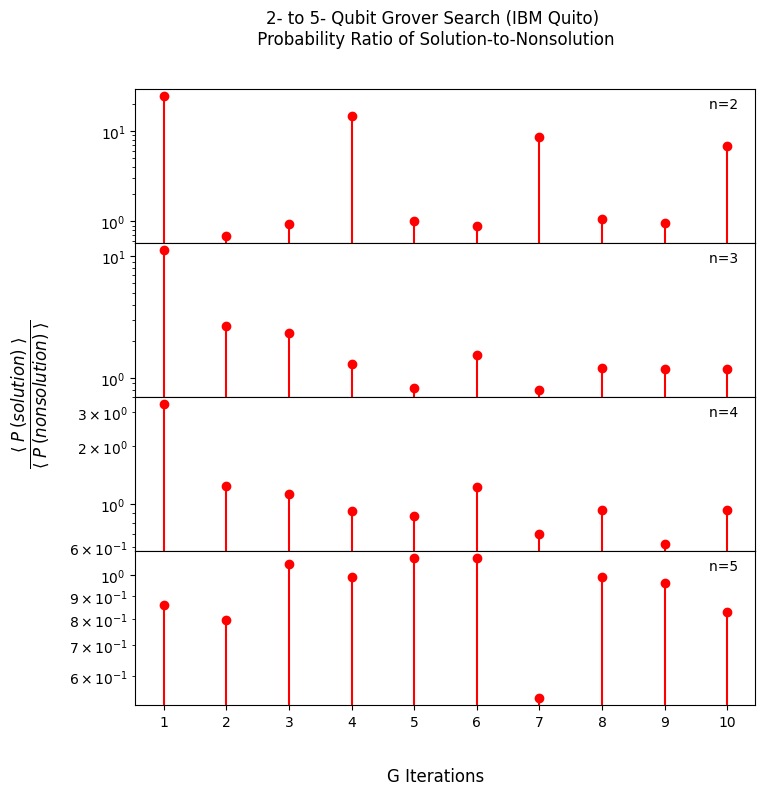

In [31]:
# Graph ratios vs. number of iterations using PyPlot

# Define x range
xrange = np.arange(1,11,1)

figure = plt.figure(1, figsize=[8,8])
figure.suptitle("2- to 5- Qubit Grover Search (IBM Quito) \n Probability Ratio of Solution-to-Nonsolution ", fontsize = "large")
figure.supxlabel("G Iterations")
figure.supylabel("$ \\dfrac{\\langle\\ P\\:(solution)\\ \\rangle}{\\langle\\ P\\:(nonsolution)\\ \\rangle} $",
                    ha="right")
gd = figure.add_gridspec(4, hspace=0)

two_qub_probs = figure.add_subplot(gd[0,0])
two_qub_probs.stem(xrange, grover2_ratios, linefmt="r")
two_qub_probs.set_yscale("log")
two_qub_probs.set_xticks(xrange)
two_qub_probs.set_xticklabels(xrange)
two_qub_probs.set_title("n=2    ", fontsize=10, loc='right', y=1, pad=-14)
two_qub_probs.label_outer()

three_qub_probs = figure.add_subplot(gd[1,0])
three_qub_probs.stem(xrange, grover3_ratios, linefmt="r")
three_qub_probs.set_yscale("log")
three_qub_probs.set_xticks(xrange)
three_qub_probs.set_xticklabels(xrange)
three_qub_probs.set_title("n=3    ", fontsize=10, loc='right', y=1, pad=-14)
# three_qub_probs.sharex(two_qub_probs)
three_qub_probs.label_outer()

four_qub_probs = figure.add_subplot(gd[2,0])
four_qub_probs.stem(xrange, grover4_ratios, linefmt="r")
four_qub_probs.set_yscale("log")
four_qub_probs.set_xticks(xrange)
four_qub_probs.set_xticklabels(xrange)
four_qub_probs.set_title("n=4    ", fontsize=10, loc='right', y=1, pad=-14)
# four_qub_probs.sharex(three_qub_probs)
four_qub_probs.label_outer()

five_qub_probs = figure.add_subplot(gd[3,0])
five_qub_probs.stem(xrange, grover5_ratios, linefmt="r")
five_qub_probs.set_yscale("log")
five_qub_probs.set_xticks(xrange)
five_qub_probs.set_xticklabels(xrange)
five_qub_probs.set_title("n=5    ", fontsize=10, loc='right', y=1, pad=-14)
# five_qub_probs.sharex(four_qub_probs)
five_qub_probs.label_outer()

figure.show()
